In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df= pd.read_csv("./data/dog_food.csv")

In [3]:
df.head()

,A,B,C,D,Spoiled
0,4,2,12.0,3,1.0
1,5,6,12.0,7,1.0
2,6,2,13.0,6,1.0
3,4,2,12.0,1,1.0
4,4,2,12.0,3,1.0


### EDA

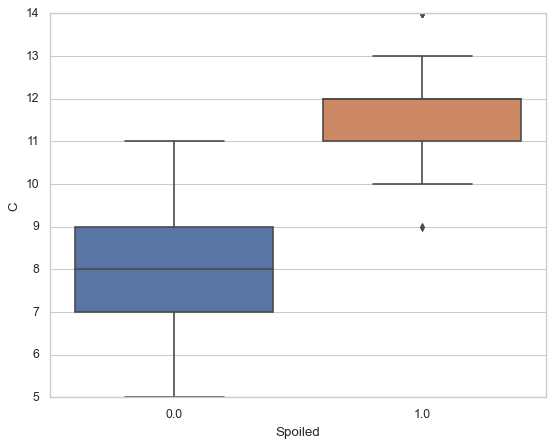

In [21]:
plt.figure()
sns.boxplot(x = "Spoiled", y = "C", data = df)
plt.show()

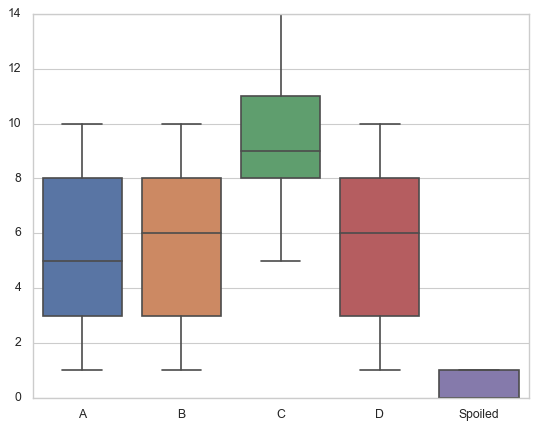

In [6]:
sns.set_theme(style = "whitegrid")

plt.figure()
sns.boxplot(df)
plt.show()

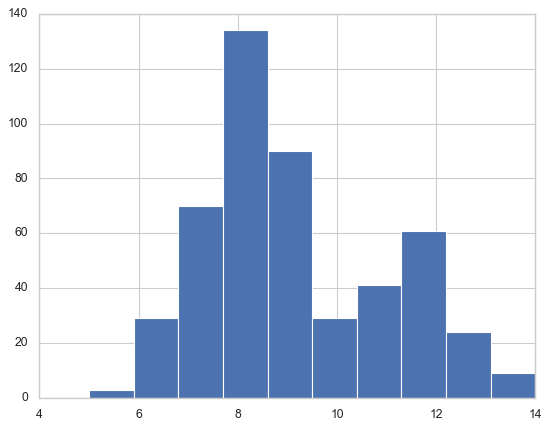

In [7]:
# C의 히스토그램
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
plt.hist(df["C"])
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


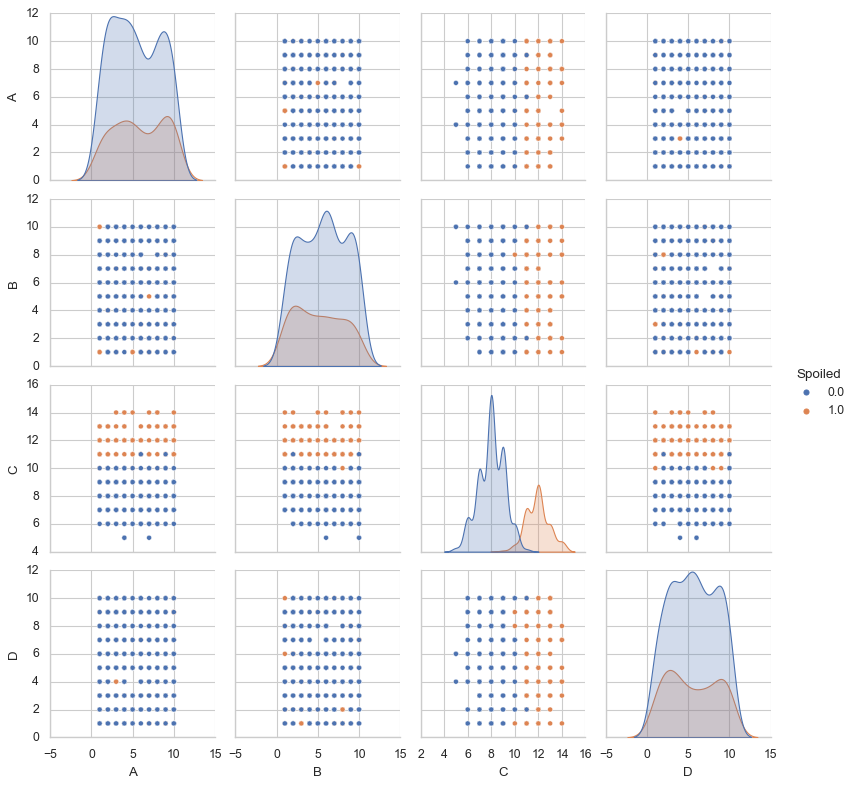

In [8]:
sns.pairplot(df, hue = "Spoiled")
plt.show()

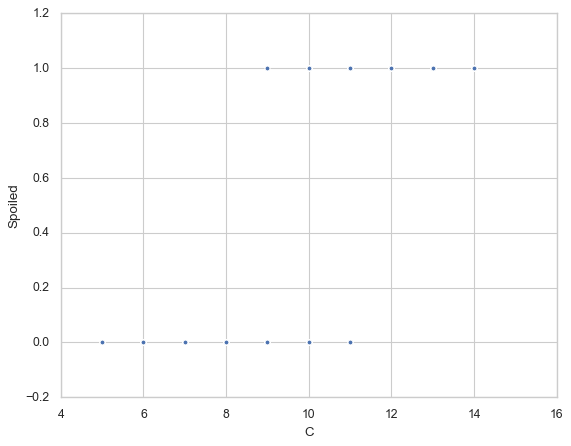

In [11]:
plt.figure()

plt.scatter(df["C"], df["Spoiled"])
plt.xlabel("C")
plt.ylabel("Spoiled")
plt.grid(True)
plt.show()

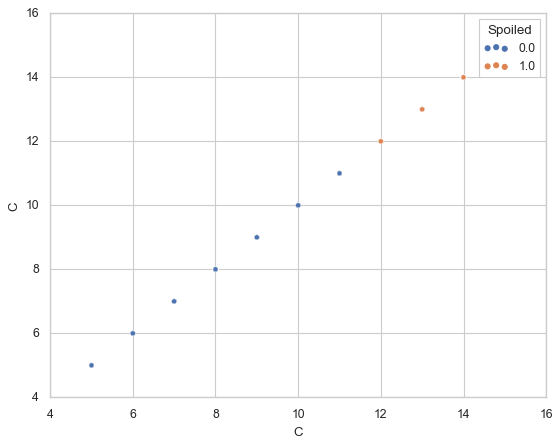

In [13]:
plt.figure()

sns.scatterplot(data = df, x = "C", y = "C", hue = "Spoiled")
plt.show()

In [15]:
corr = df.corr()
corr

,A,B,C,D,Spoiled
A,1.000000,0.007267,0.057588,-0.045834,0.059973
B,0.007267,1.000000,-0.117222,-0.036436,-0.086474
C,0.057588,-0.117222,1.000000,-0.034477,0.858620
D,-0.045834,-0.036436,-0.034477,1.000000,-0.016067
Spoiled,0.059973,-0.086474,0.858620,-0.016067,1.000000


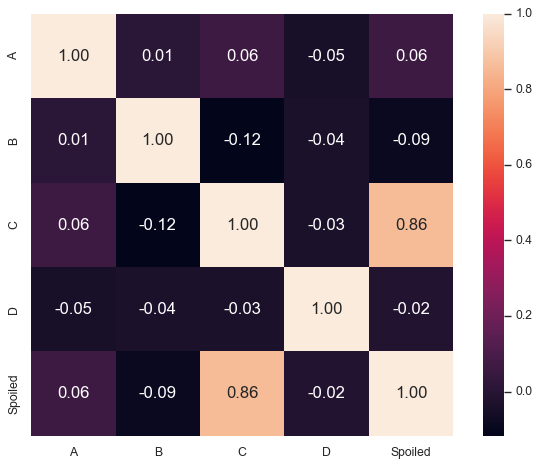

In [16]:
plt.figure()

hm = sns.heatmap(corr.values, cbar = True, annot = True, square = True, fmt = ".2f",
                annot_kws = {"size" : 15}, yticklabels = df.columns, xticklabels = df.columns)
plt.tight_layout()
plt.show()

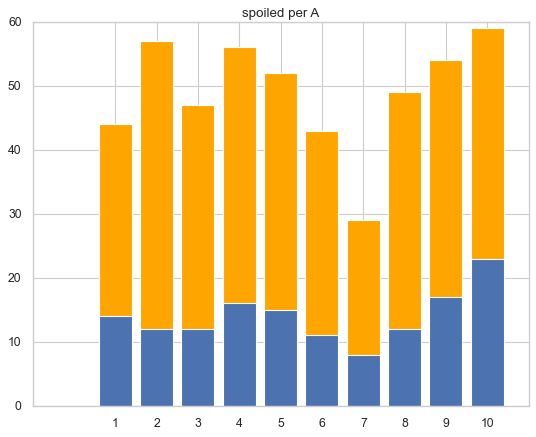

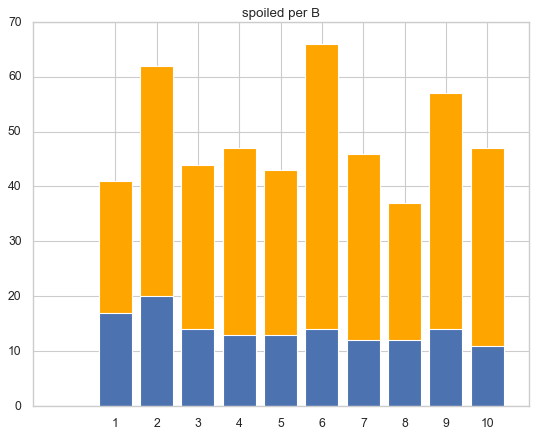

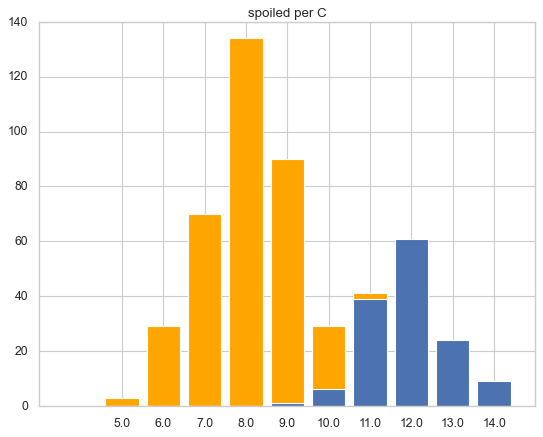

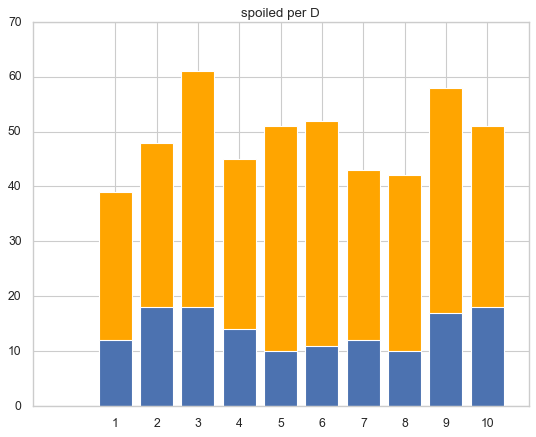

In [19]:
for i in df.columns[:-1]:
    plt.bar(np.arange(len(df[i].unique())), df[i].value_counts().sort_index(), color = "orange")
    plt.bar(np.arange(len(df[i].unique())), df.groupby(i)["Spoiled"].sum().values)
    plt.xticks(np.arange(len(df[i].unique())), df[i].sort_values().unique())
    plt.title(f"spoiled per {i}")
    plt.show()

In [24]:
# 분산의 동일성 검정
# 두 집단의 분산이 같다(등분산성 만족)
stats.bartlett(df.loc[df["Spoiled"] == 1, "C"],
              df.loc[df["Spoiled"] == 0, "C"])

BartlettResult(statistic=2.433612464987829, pvalue=0.11875893707242617)

In [26]:
# t-test
# 두 집단의 평균이 다르다
stats.ttest_ind(df.loc[df["Spoiled"] == 1, "C"],
                df.loc[df["Spoiled"] == 0, "C"], equal_var = True)

TtestResult(statistic=37.00175815922425, pvalue=1.0006887690101255e-143, df=488.0)